# Fundamentos e Técnicas em Ciência de Dados
# Arthur Lisboa 

## Análise exploratória de dados:

### Exclusão de variáveis

In [46]:
import pandas as pd

# Carregar a base de dados
df = pd.read_csv("brasileirao.mod.csv")

# Excluir as variáveis goals_diff, acronym e full_name
variaveis_para_excluir = ['goals_diff', 'acronym', 'full_name']
df = df.drop(columns=variaveis_para_excluir)

# Salvar a base atualizada
df.to_csv("brasileirao.mod.atualizado.csv", index=False)

print("As variáveis goals_diff, acronym e full_name foram excluídas.")


As variáveis goals_diff, acronym e full_name foram excluídas.


### Ordenando dataframe de acordo com a variável SEASON

In [47]:
# Ordenando a base de dados pela variável 'season' de forma crescente e salvando no DataFrame original
df.sort_values(by='season', ascending=True, inplace=True)

# Sobrescrevendo o arquivo CSV original com os dados ordenados
df.to_csv("brasileirao.mod.atualizado.csv", index=False)

# Confirmação
print("Base de dados ordenada pela variável 'season' e arquivo original sobrescrito.")


Base de dados ordenada pela variável 'season' e arquivo original sobrescrito.


## a. Descrição do tipo das variáveis entre quantitativas e qualitativas, incluindo as subclassificações.


In [28]:
import pandas as pd

# Carregar a base de dados
data = pd.read_csv('brasileirao.mod.atualizado.csv')

# Criar uma tabela com as variáveis e seus tipos
variaveis_tipos = pd.DataFrame({
    'Variável': data.columns,
    'Tipo': data.dtypes.values
})

# Exibir a tabela
print(variaveis_tipos)


       Variável     Tipo
0        season    int64
1         place    int64
2          team   object
3        points    int64
4        played    int64
5           won    int64
6          draw    int64
7          loss    int64
8         goals  float64
9   goals_taken  float64
10      founded  float64
11      stadium   object
12         city   object
13        state   object
14       region   object


## Classificação das variáveis: 

#### season: Quantitativa - Discreta
#### place: Quantitativa - Discreta
#### team: Qualitativa - Nominal
#### points: Quantitativa - Discreta
#### played: Quantitativa - Discreta
#### won: Quantitativa - Discreta
#### draw: Quantitativa - Discreta
#### loss: Quantitativa - Discreta
#### goals: Quantitativa - Contínua
#### goals_taken: Quantitativa - Contínua
#### founded: Quantitativa - Discreta
#### stadium: Qualitativa - Nominal
#### city: Qualitativa - Nominal
#### state: Qualitativa - Nominal
#### region: Qualitativa - Nominal

## b. Descrição das estatísticas básicas de cada variável: medidas de tendência central (média, moda, mediana), medidas de dispersão (variância, amplitude), estatísticas de ordem (mínimo e máximo) e quantidade de valores distintos, quando aplicável.


## Variáveis Quantitativas:

In [49]:
import pandas as pd

df = pd.read_csv('brasileirao.mod.atualizado.csv')

df = pd.DataFrame(df)

# Selecionando todas as colunas numéricas
numerical_columns = df.select_dtypes(include='number').columns

# Calculando as estatísticas
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]
variance_values = df[numerical_columns].var()
std_dev_values = df[numerical_columns].std()
min_values = df[numerical_columns].min()
max_values = df[numerical_columns].max()
nunique_values = df[numerical_columns].nunique()

# Criando um novo DataFrame com os resultados
stats_df = pd.DataFrame({
    'Média': mean_values,
    'Mediana': median_values,
    'Moda': mode_values,
    'Variância': variance_values,
    'Desvio Padrão': std_dev_values,
    'Mínimo': min_values,
    'Máximo': max_values,
    'Valores Distintos': nunique_values
})

# Exibindo a tabela organizada
print(stats_df)


                   Média  Mediana    Moda   Variância  Desvio Padrão  Mínimo  \
season       2012.837778   2013.0  2003.0   44.367835       6.660918  1999.0   
place          10.762222     11.0     1.0   35.642668       5.970148     1.0   
points         52.584444     51.5    54.0  168.403766      12.977048    13.0   
played         38.493333     38.0    38.0   10.660312       3.265013    32.0   
won            13.860000     13.0    13.0   23.403519       4.837718     1.0   
draw            9.437778      9.0     8.0   11.293447       3.360572     1.0   
loss           13.877778     14.0    13.0   22.561866       4.749933     0.0   
goals          49.647196     49.0    49.0  161.034489      12.689937    18.0   
goals_taken    49.306075     47.0    42.0  161.767926      12.718802    19.0   
founded      1918.159624   1912.0  1909.0  457.047401      21.378667  1895.0   

             Máximo  Valores Distintos  
season       2027.0                 29  
place          24.0                 2

## Variáveis Qualitativas:

In [52]:
import pandas as pd

df = pd.read_csv('brasileirao.mod.atualizado.csv')

df = pd.DataFrame(df)

# Selecionando todas as colunas qualitativas (não numéricas)
categorical_columns = df.select_dtypes(exclude='number').columns

# Calculando as estatísticas para variáveis qualitativas
mode_values_categorical = df[categorical_columns].mode().iloc[0]
nunique_values_categorical = df[categorical_columns].nunique()

# Criando um novo DataFrame com os resultados
categorical_stats_df = pd.DataFrame({
    'Moda': mode_values_categorical,
    'Valores Distintos': nunique_values_categorical,
})

# Exibindo a tabela organizada para as variáveis qualitativas
print(categorical_stats_df)


                         Moda  Valores Distintos
team     Athletico Paranaense                 44
stadium      Arena da Baixada                 43
city                Sao Paulo                 26
state               Sao Paulo                 15
region              Southeast                  5


## Histogramas, Gráficos de Densidade e Gráficos 

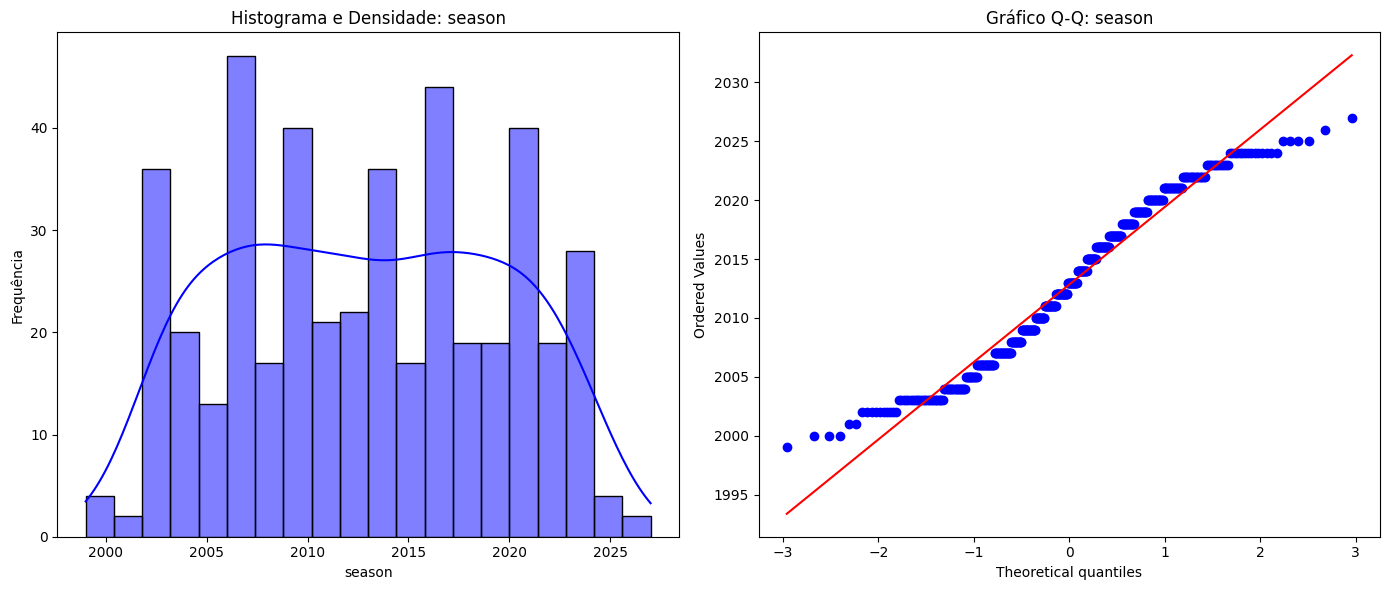

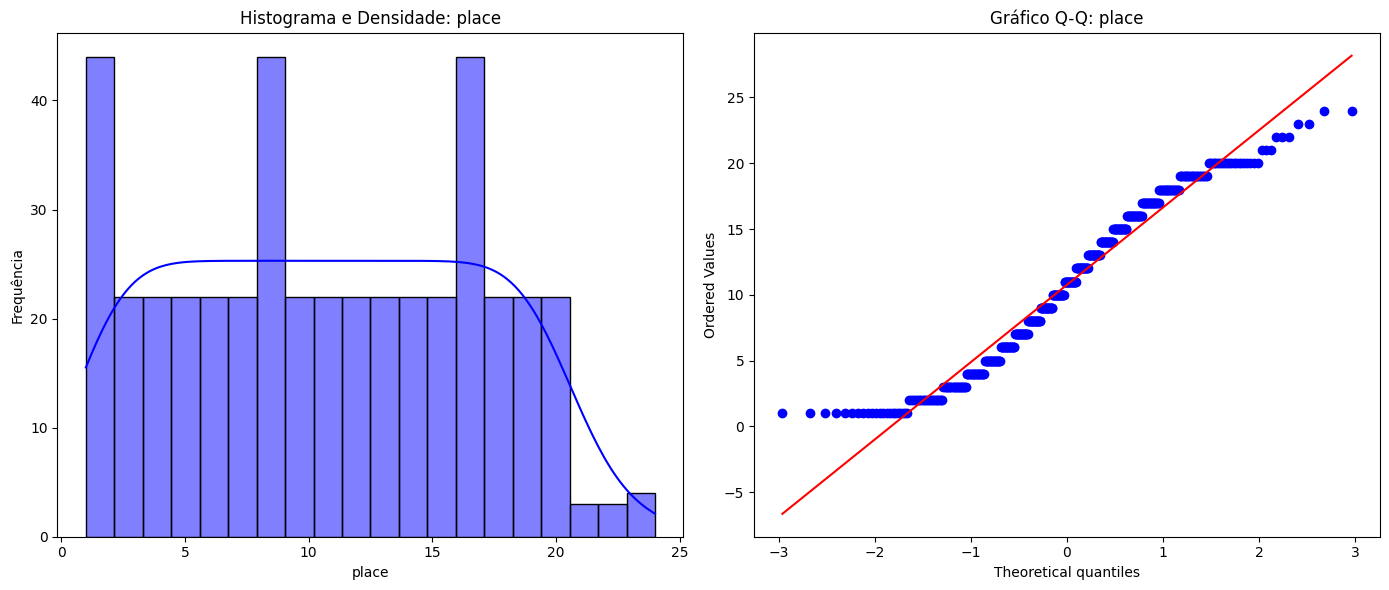

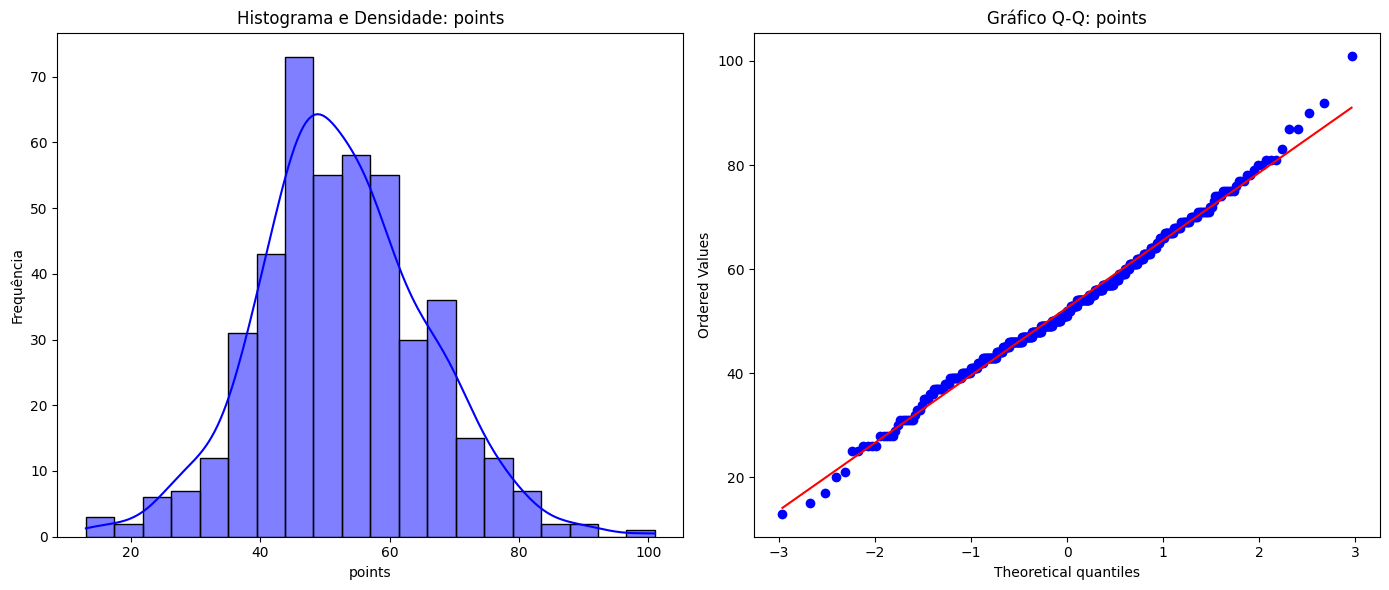

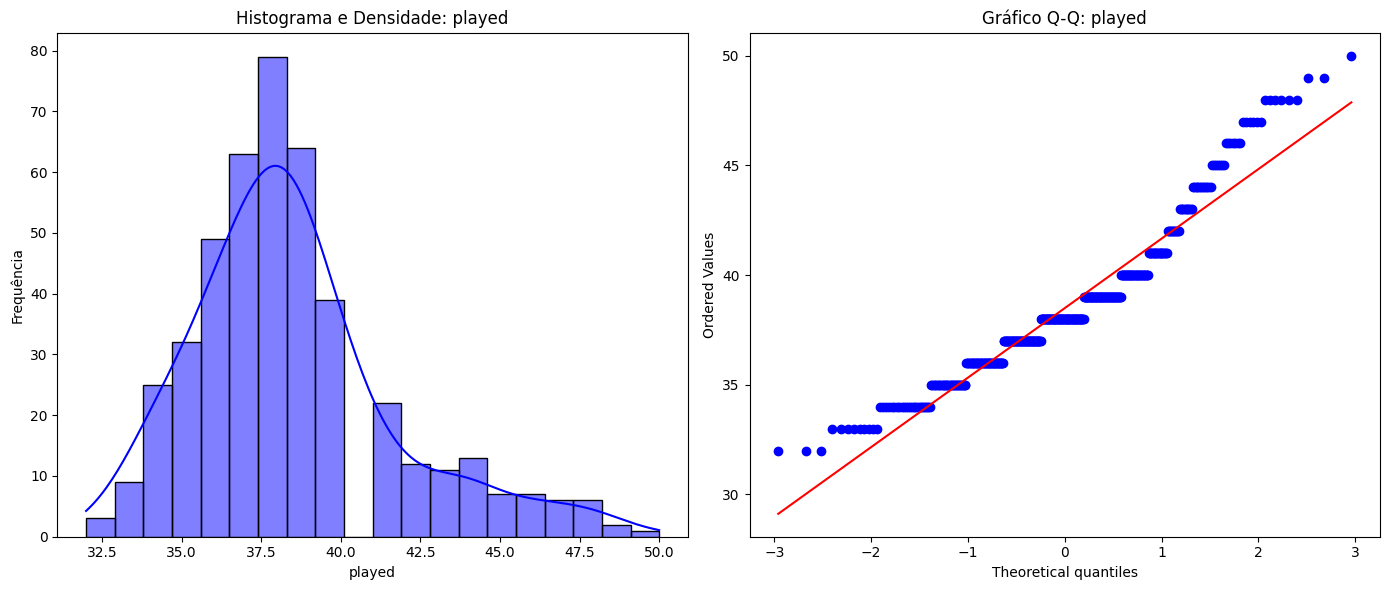

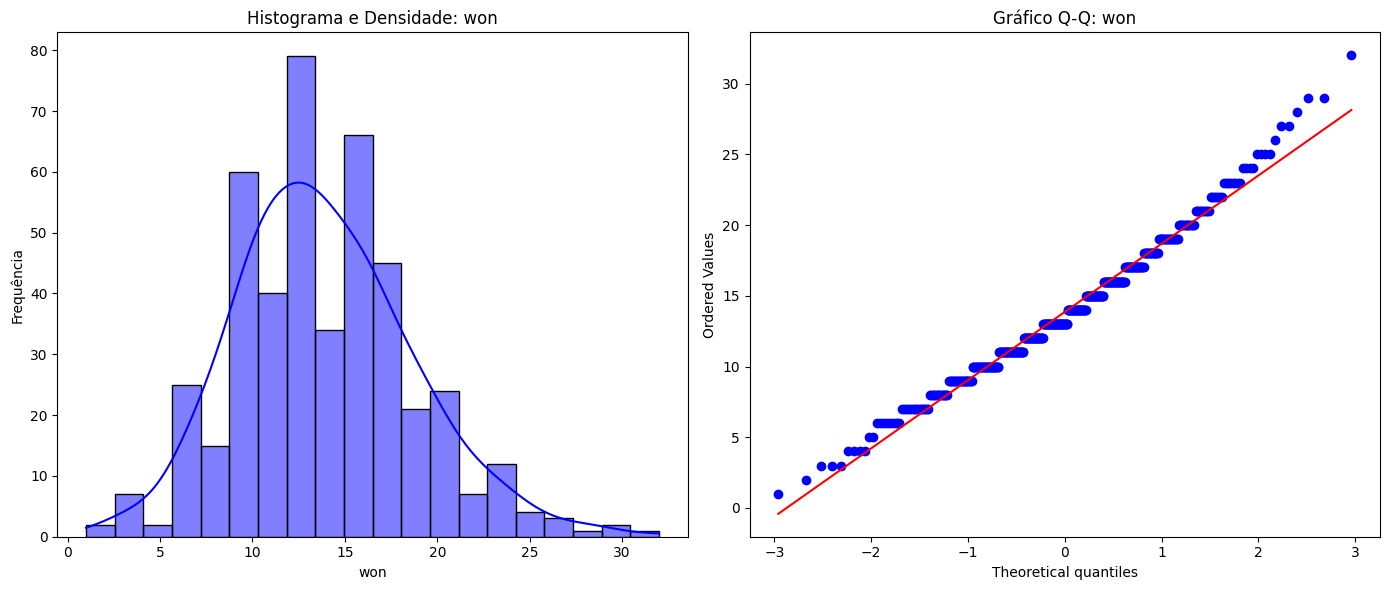

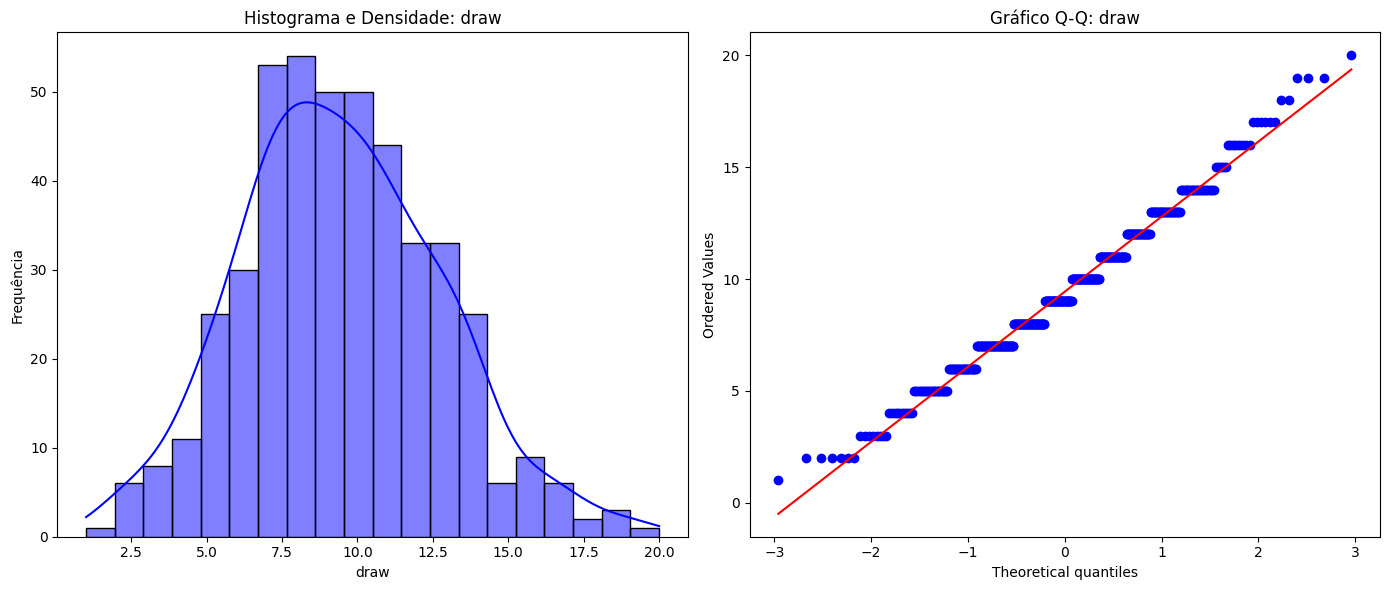

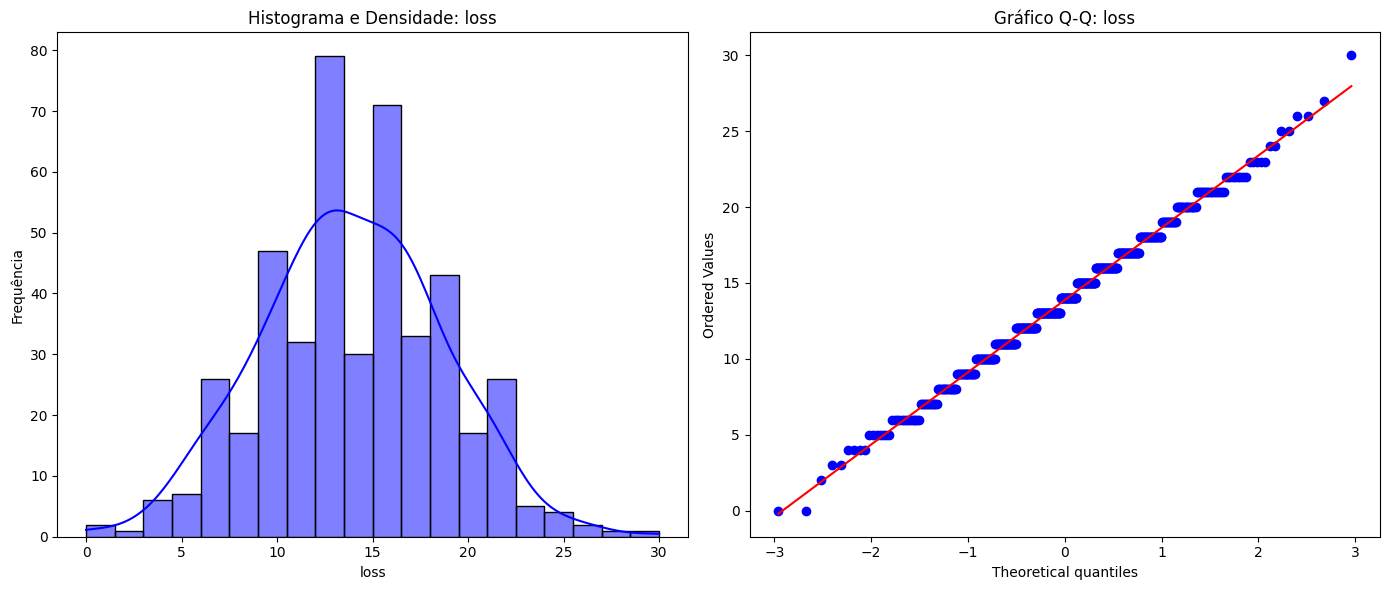

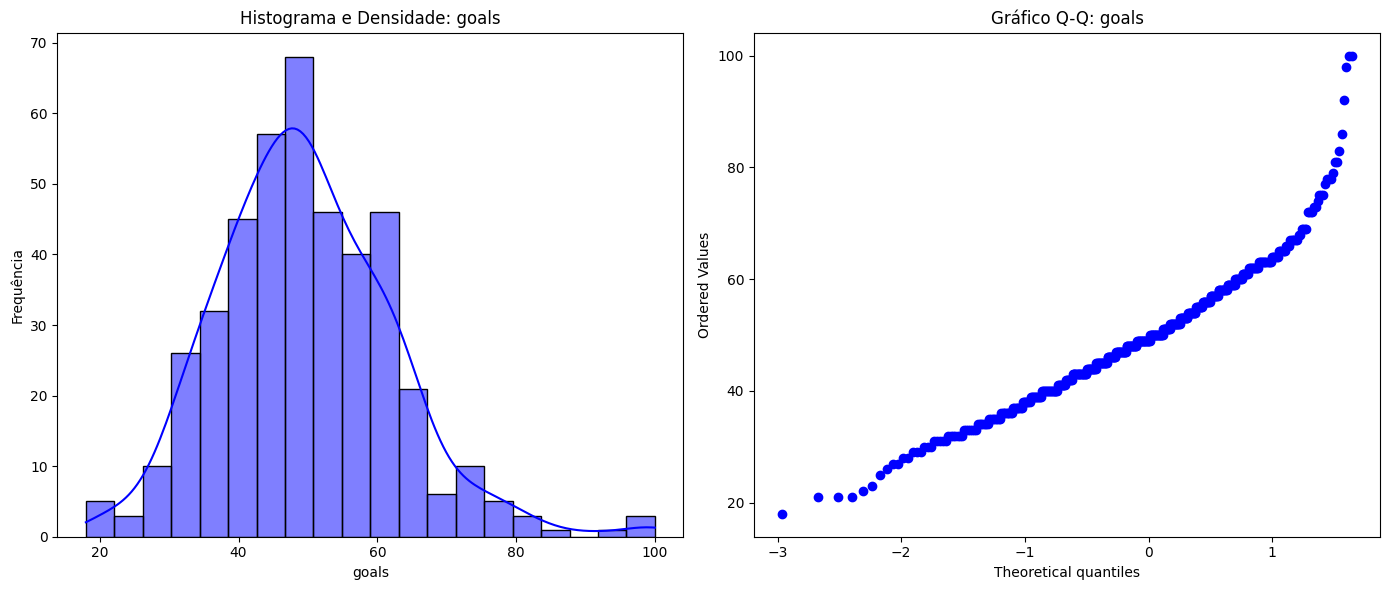

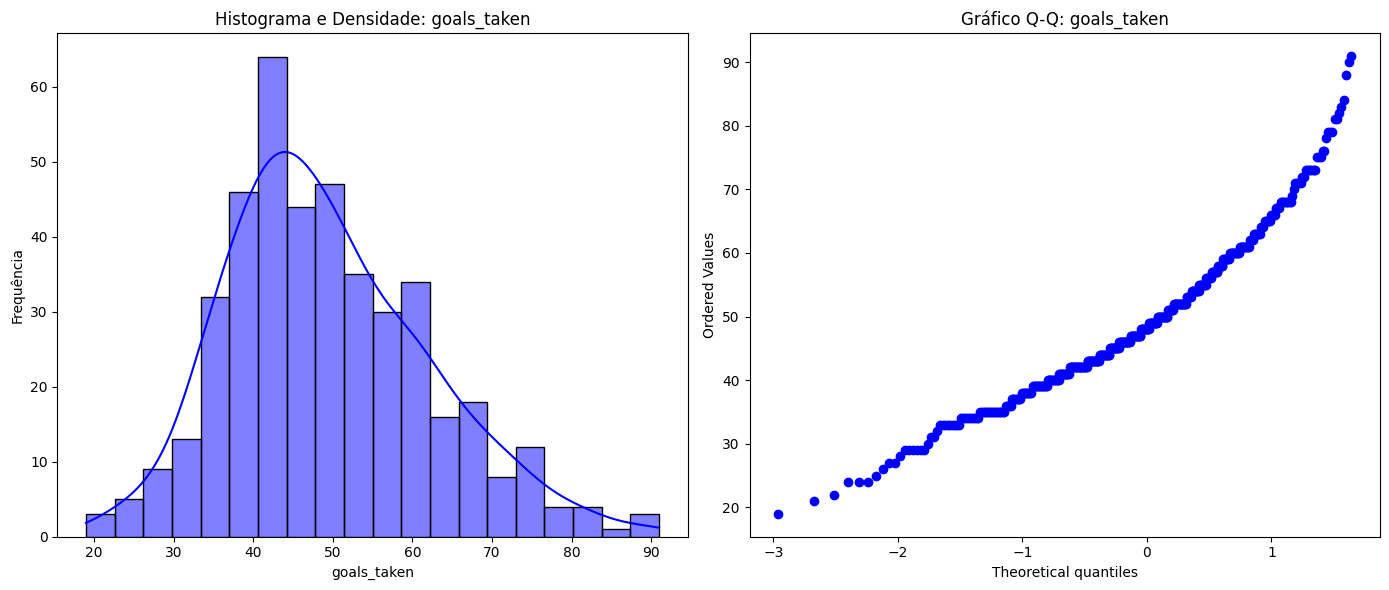

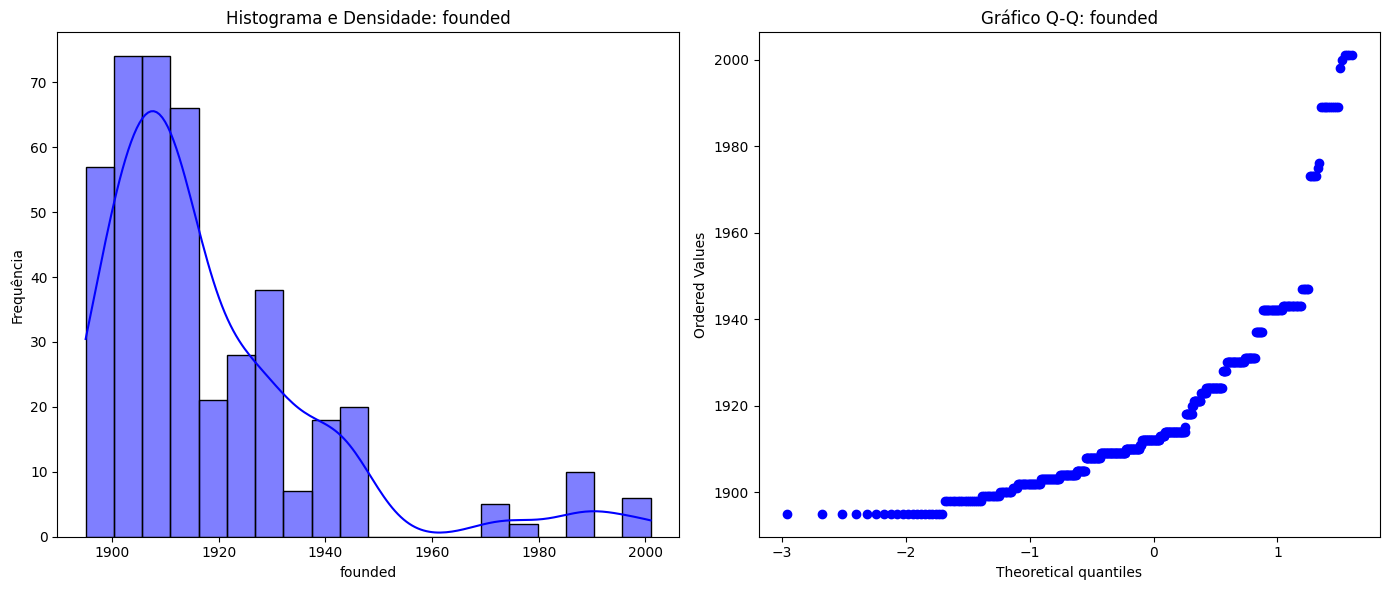

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Carregar os dados
data = pd.read_csv('brasileirao.mod.atualizado.csv')  

# Função para criar histograma/densidade e gráfico Q-Q lado a lado
def plot_histogram_qq(data, column):
    # Criar a figura com subplots (1 linha, 2 colunas)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histograma e gráfico de densidade
    sns.histplot(data[column], kde=True, color='blue', bins=20, ax=axes[0])
    axes[0].set_title(f'Histograma e Densidade: {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequência')
    
    # Gráfico Q-Q
    stats.probplot(data[column], dist="norm", plot=axes[1])
    axes[1].set_title(f'Gráfico Q-Q: {column}')
    
    # Ajustar espaçamento
    plt.tight_layout()
    plt.show()

# Chamar a função para cada variável
columns = ['season', 'place', 'points', 'played', 'won', 'draw', 
           'loss', 'goals', 'goals_taken', 'founded']

for column in columns:
    plot_histogram_qq(data, column)


## Teste de normalidade (Shapiro-Wilk)

In [7]:
data = pd.read_csv('brasileirao.mod.atualizado.csv')  

# Função para realizar o teste de normalidade
def normality_test(data, column):
    stat, p_value = stats.shapiro(data[column])
    return stat, p_value

stat_season, p_value_season = normality_test(data, 'season')
print(f"Estatística: {stat_season}, p-valor-season: {p_value_season}")

stat_place, p_value_place = normality_test(data, 'place')
print(f"Estatística: {stat_place}, p-valor-place: {p_value_place}")

stat_points, p_value_points = normality_test(data, 'points')
print(f"Estatística: {stat_points}, p-valor-points: {p_value_points}")

stat_played, p_value_played = normality_test(data, 'played')
print(f"Estatística: {stat_played}, p-valor-played: {p_value_played}")

stat_won, p_value_won = normality_test(data, 'won')
print(f"Estatística: {stat_won}, p-valor-won: {p_value_won}")

stat_draw, p_value_draw = normality_test(data, 'draw')
print(f"Estatística: {stat_draw}, p-valor-draw: {p_value_draw}")

stat_loss, p_value_loss = normality_test(data, 'loss')
print(f"Estatística: {stat_loss}, p-valor-loss: {p_value_loss}")

stat_goals, p_value_goals = normality_test(data, 'goals')
print(f"Estatística: {stat_goals}, p-valor-goals: {p_value_goals}")

stat_goals_taken, p_value_goals_taken = normality_test(data, 'goals_taken')
print(f"Estatística: {stat_goals_taken}, p-valor-goals_taken: {p_value_goals_taken}")

stat_founded, p_value_founded = normality_test(data, 'founded')
print(f"Estatística: {stat_founded}, p-valor-founded: {p_value_founded}")

Estatística: 0.9638900410138384, p-valor-season: 4.535689685853658e-09
Estatística: 0.9589728560692492, p-valor-place: 7.123611704118619e-10
Estatística: 0.9933878771338813, p-valor-points: 0.04592056785804366
Estatística: 0.9333362195476878, p-valor-played: 2.716718818998048e-13
Estatística: 0.9848466415192478, p-valor-won: 0.00012136339974569212
Estatística: 0.9865400850277026, p-valor-draw: 0.0003542076707421451
Estatística: 0.9952177760456924, p-valor-loss: 0.18124438718679758
Estatística: nan, p-valor-goals: nan
Estatística: nan, p-valor-goals_taken: nan
Estatística: nan, p-valor-founded: nan


## d. Indicação da presença de valores faltosos em cada variável.

In [29]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado.csv')

# Verificar a quantidade de valores faltosos por coluna
missing_values = df.isnull().sum()
print("Valores faltosos por coluna:")
print(missing_values)

# Calcular a porcentagem de valores faltosos
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPorcentagem de valores faltosos por coluna:")
print(missing_percentage)


Valores faltosos por coluna:
season          0
place           0
team           22
points          0
played          0
won             0
draw            0
loss            0
goals          22
goals_taken    22
founded        24
stadium        24
city           24
state          24
region         24
dtype: int64

Porcentagem de valores faltosos por coluna:
season         0.000000
place          0.000000
team           4.888889
points         0.000000
played         0.000000
won            0.000000
draw           0.000000
loss           0.000000
goals          4.888889
goals_taken    4.888889
founded        5.333333
stadium        5.333333
city           5.333333
state          5.333333
region         5.333333
dtype: float64


## Padronização dos dados

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Carregar os dados
df = pd.read_csv('brasileirao.mod.atualizado.csv')

# Definir as variáveis quantitativas e qualitativas (verificar a existência no DataFrame)
quantitative_columns = ['points', 'played', 'won', 'draw', 'loss', 'goals_taken', 'goals']
qualitative_columns = ['team', 'founded', 'stadium', 'city', 'state', 'region']
quantitative_columns = [col for col in quantitative_columns if col in df.columns]
qualitative_columns = [col for col in qualitative_columns if col in df.columns]

# Dividir os dados em treino (60%), validação (20%) e teste (20%)
X_train, X_temp = train_test_split(df, test_size=0.4, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

# Função de preprocessamento
def preprocess_data(X, is_train, quantitative_imputer=None, qualitative_imputer=None):
    X = X.copy()
    missing_mask = X.isna()  # Salvar a máscara de valores ausentes
    if is_train:
        # Ajustar os imputadores nos dados de treino
        quantitative_imputer = SimpleImputer(strategy='mean')
        qualitative_imputer = SimpleImputer(strategy='most_frequent')
        X[quantitative_columns] = quantitative_imputer.fit_transform(X[quantitative_columns])
        X[qualitative_columns] = qualitative_imputer.fit_transform(X[qualitative_columns])
    else:
        # Aplicar os imputadores ajustados
        X[quantitative_columns] = quantitative_imputer.transform(X[quantitative_columns])
        X[qualitative_columns] = qualitative_imputer.transform(X[qualitative_columns])
    return X, missing_mask, quantitative_imputer, qualitative_imputer

# Pré-processar os conjuntos
X_train, missing_train, quantitative_imputer, qualitative_imputer = preprocess_data(X_train, is_train=True)
X_val, missing_val, _, _ = preprocess_data(X_val, is_train=False, quantitative_imputer=quantitative_imputer, qualitative_imputer=qualitative_imputer)
X_test, missing_test, _, _ = preprocess_data(X_test, is_train=False, quantitative_imputer=quantitative_imputer, qualitative_imputer=qualitative_imputer)

# Padronizar os dados quantitativos usando MinMaxScaler
scaler = MinMaxScaler()
X_train[quantitative_columns] = scaler.fit_transform(X_train[quantitative_columns])
X_val[quantitative_columns] = scaler.transform(X_val[quantitative_columns])
X_test[quantitative_columns] = scaler.transform(X_test[quantitative_columns])

# Criar a base padronizada com valores imputados
imputed_dataset = pd.concat([X_train, X_val, X_test], ignore_index=True)
imputed_dataset.to_csv("imputed_dataset_preprocessed.csv", index=False)

# Restaurar valores ausentes originais
X_train[missing_train] = pd.NA
X_val[missing_val] = pd.NA
X_test[missing_test] = pd.NA

# Criar a base padronizada mantendo os valores ausentes
missing_dataset = pd.concat([X_train, X_val, X_test], ignore_index=True)
missing_dataset.to_csv("brasileirao.padronizado.csv", index=False)

# Verificar valores ausentes
print("Valores ausentes na base com valores restaurados:")
print(missing_dataset.isna().sum())

print("Valores ausentes na base com valores imputados:")
print(imputed_dataset.isna().sum())


Valores ausentes na base com valores restaurados:
season          0
place           0
team           22
points          0
played          0
won             0
draw            0
loss            0
goals          22
goals_taken    22
founded        24
stadium        24
city           24
state          24
region         24
dtype: int64
Valores ausentes na base com valores imputados:
season         0
place          0
team           0
points         0
played         0
won            0
draw           0
loss           0
goals          0
goals_taken    0
founded        0
stadium        0
city           0
state          0
region         0
dtype: int64


### A padronização não se provou util para melhorar o resultado

## Substituição dos valores faltosos por meio de indutor, ou seja, deve ser modelado um indutor (classificador ou regressor, como k-NN, regressão linear ou regressão logística) diferente para cada variável com valores faltoso, tomando-o como variável alvo e usando as demais variáveis como preditoras.


## Variável Goals

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado.csv')

# Definir as variáveis preditoras
predictors = ['season', 'points', 'played', 'won', 'draw', 'loss']

# Passo 1: Separar os dados com valores ausentes em 'goals'
missing_goals = df[df['goals'].isna()]
X_missing = missing_goals[predictors]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
X_full = df.dropna(subset=['goals'])[predictors]  # Dados com valores não ausentes
y_full = df.dropna(subset=['goals'])['goals']  # Valores não ausentes de 'goals'

# Passo 3: Dividir os dados em treino e teste (Holdout)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Passo 4: Treinar o modelo de Regressão Linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Passo 5: Avaliar o modelo no conjunto de teste
y_pred_test = model_lr.predict(X_test)  # Previsões no conjunto de teste

# Calcular o MSE e R² no conjunto de teste
mse_lr_test = mean_squared_error(y_test, y_pred_test)
r2_lr_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (MSE) no conjunto de teste:", mse_lr_test)
print("R² Score no conjunto de teste:", r2_lr_test)

# Passo 6: Preencher os valores ausentes de 'goals' com o modelo treinado
df.loc[df['goals'].isna(), 'goals'] = model_lr.predict(X_missing)

# Passo 7: Salvar a base de dados com os valores preenchidos
df.to_csv("brasileirao.mod.atualizado2.csv", index=False)



Mean Squared Error (MSE) no conjunto de teste: 50.342984287558394
R² Score no conjunto de teste: 0.681751525877228


## Variável Goals_Taken

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado2.csv')

# Definir as variáveis preditoras (com 'goals' adicionada)
predictors = ['season', 'points', 'played', 'won', 'draw', 'loss', 'goals']

# Passo 1: Separar os dados com valores ausentes em 'goals_taken'
missing_goals_taken = df[df['goals_taken'].isna()]
X_missing = missing_goals_taken[predictors]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
X_full = df.dropna(subset=['goals_taken'])[predictors]  # Dados com valores não ausentes
y_full = df.dropna(subset=['goals_taken'])['goals_taken']  # Valores não ausentes de 'goals_taken'

# Passo 3: Dividir os dados em treino e teste (Hold Out)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Passo 4: Treinar o modelo de Regressão Linear no conjunto de treino
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Passo 5: Avaliar o modelo no conjunto de teste
y_pred_test = model_lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (MSE) no conjunto de teste:", mse_test)
print("R² Score no conjunto de teste:", r2_test)

# Passo 6: Preencher os valores ausentes de 'goals_taken' com o modelo de Regressão Linear
df.loc[df['goals_taken'].isna(), 'goals_taken'] = model_lr.predict(X_missing)

# Passo 7: Salvar a base de dados com os valores preenchidos
df.to_csv("brasileirao.mod.atualizado3.csv", index=False)


Mean Squared Error (MSE) no conjunto de teste: 54.826524338887104
R² Score no conjunto de teste: 0.6833469933667071


## Variável Team

In [5]:

import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado3.csv')

# Definir as variáveis preditoras
predictors = ['goals', 'goals_taken', 'points', 'played', 'won', 'draw', 'loss']

# Passo 1: Separar os dados com valores ausentes em 'team'
missing_team = df[df['team'].isna()]
X_missing = missing_team[predictors]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
X_train = df.dropna(subset=['team'])[predictors]  # Dados com valores não ausentes
y_train = df.dropna(subset=['team'])['team']  # Valores não ausentes de 'team'

# Passo 3: Dividir o conjunto de dados em treino e teste para avaliação, um subconjunto para testar o modelo (neste caso, 20% dos dados, test_size=0.2).
# Holdout:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Passo 4: Treinar o modelo k-NN para classificação
model_knn = KNeighborsClassifier(n_neighbors=5)  # Ajustar o valor de k conforme necessário
model_knn.fit(X_train, y_train)

# Passo 5: Avaliar o desempenho do modelo (usando acurácia)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Acurácia k-NN:", accuracy_knn)

# Passo 6: Preencher os valores ausentes de 'team' usando o modelo k-NN
df.loc[df['team'].isna(), 'team'] = model_knn.predict(X_missing)

# Passo 7: Salvar a base de dados com os valores preenchidos
df.to_csv("brasileirao.mod.atualizado4.csv", index=False)

Acurácia k-NN: 0.05813953488372093


## Variável City

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado4.csv')

# Passo 1: Separar os dados com valores ausentes em 'city'
missing_city = df[df['city'].isna()]
X_missing = missing_city[['team']]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
X_train = df.dropna(subset=['city'])[['team']]  # Dados com valores não ausentes
y_train = df.dropna(subset=['city'])['city']   # Valores não ausentes de 'city'

# Passo 3: Dividir o conjunto de dados em treino e teste para avaliação, um subconjunto para testar o modelo (neste caso, 20% dos dados, test_size=0.2).
# Holdout:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Passo 4: Definir o pipeline com One Hot Encoding para a variável 'team'
preprocessor = ColumnTransformer(
    transformers=[
        ('team', OneHotEncoder(handle_unknown='ignore'), ['team'])  # Ignorar categorias desconhecidas
    ])

# Passo 5: Criar um pipeline que inclui o pré-processamento e o modelo Random Forest
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinar o modelo Random Forest
model_rf.fit(X_train, y_train)

# Passo 6: Avaliar o desempenho do modelo
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Acurácia) Random Forest:", accuracy_rf)

# Passo 7: Preencher os valores ausentes de 'city' usando o modelo Random Forest
df.loc[df['city'].isna(), 'city'] = model_rf.predict(X_missing)

# Passo 8: Salvar a base de dados com os valores preenchidos
df.to_csv("brasileirao.mod.atualizado5.csv", index=False)


Accuracy (Acurácia) Random Forest: 0.9767441860465116


## Variável State


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado5.csv')

# Passo 1: Separar os dados com valores ausentes em 'state'
missing_state = df[df['state'].isna()]
X_missing = missing_state[['city']]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
X_train = df.dropna(subset=['state'])[['city']]  # Dados com valores não ausentes
y_train = df.dropna(subset=['state'])['state']   # Valores não ausentes de 'state'

# Passo 3: Dividir o conjunto de dados em treino e teste para avaliação, um subconjunto para testar o modelo (neste caso, 20% dos dados, test_size=0.2).
# Holdout:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Passo 4: Definir o pipeline com One Hot Encoding para a variável 'city'
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(handle_unknown='ignore'), ['city'])  # Ignorar categorias desconhecidas
    ])

# Passo 5: Criar um pipeline que inclui o pré-processamento e o modelo Random Forest
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinar o modelo Random Forest
model_rf.fit(X_train, y_train)

# Passo 6: Avaliar o desempenho do modelo
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Acurácia) Random Forest:", accuracy_rf)

# Passo 7: Preencher os valores ausentes de 'state' usando o modelo Random Forest
df.loc[df['state'].isna(), 'state'] = model_rf.predict(X_missing)

# Passo 8: Salvar a base de dados com os valores preenchidos
df.to_csv("brasileirao.mod.atualizado6.csv", index=False)


Accuracy (Acurácia) Random Forest: 0.9883720930232558


## Variável Region

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado6.csv')

# Passo 1: Separar os dados com valores ausentes em 'region'
missing_region = df[df['region'].isna()]
X_missing = missing_region[['city', 'state']]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
df_clean = df.dropna(subset=['region'])  # Dados com valores não ausentes
X = df_clean[['city', 'state']]         # Variáveis preditoras
y = df_clean['region']                  # Alvo

# Passo 3: Dividir o conjunto de dados em treino e teste para avaliação, um subconjunto para testar o modelo (neste caso, 20% dos dados, test_size=0.2).
# Holdout:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Definir o pipeline com One Hot Encoding para as variáveis 'city' e 'state'
preprocessor = ColumnTransformer(
    transformers=[
        ('city_state', OneHotEncoder(handle_unknown='ignore'), ['city', 'state'])  # Ignorar categorias desconhecidas
    ])

# Passo 5: Criar um pipeline que inclui o pré-processamento e o modelo Random Forest
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinar o modelo Random Forest
model_rf.fit(X_train, y_train)

# Passo 6: Avaliar o desempenho do modelo
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Acurácia) Random Forest:", accuracy_rf)


# Passo 7: Preencher os valores ausentes de 'region' usando o modelo Random Forest
df.loc[df['region'].isna(), 'region'] = model_rf.predict(X_missing)

# Passo 8: Salvar a base de dados com os valores preenchidos
df.to_csv('brasileirao.mod.atualizado7.csv', index=False)

Accuracy (Acurácia) Random Forest: 0.9883720930232558


## Variável stadium

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado7.csv')

# Passo 1: Separar os dados com valores ausentes em 'stadium'
missing_stadium = df[df['stadium'].isna()]
X_missing = missing_stadium[['city', 'state', 'region']]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
df_clean = df.dropna(subset=['stadium'])  # Filtrar dados com valores não ausentes na coluna 'stadium'
X = df_clean[['city', 'state', 'region']]  # Variáveis preditoras
y = df_clean['stadium']  # Alvo (stadium)

# Passo 3: Dividir o conjunto de dados em treino e teste para avaliação, um subconjunto para testar o modelo (neste caso, 20% dos dados, test_size=0.2).
# Holdout:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Definir o pipeline com One Hot Encoding para as variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['city', 'state', 'region'])  # Aplicar OneHotEncoder
    ])

# Passo 5: Criar um pipeline que inclui o pré-processamento e o modelo KNN
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Usando 5 vizinhos como padrão
])

# Treinar o modelo KNN
model_knn.fit(X_train, y_train)

# Passo 6: Avaliar o desempenho do modelo
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (Acurácia) KNN:", accuracy_knn)

# Passo 7: Preencher os valores ausentes de 'stadium' usando o modelo KNN
df.loc[df['stadium'].isna(), 'stadium'] = model_knn.predict(X_missing)

# Passo 8: Salvar a base de dados com os valores preenchidos
df.to_csv("brasileirao.mod.atualizado8.csv", index=False)


Accuracy (Acurácia) KNN: 0.4883720930232558


## Variável founded 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado8.csv')

# Passo 1: Separar os dados com valores ausentes em 'founded'
missing_founded = df[df['founded'].isna()]
X_missing = missing_founded[['team']]  # Variáveis preditoras para dados ausentes

# Passo 2: Definir as variáveis preditoras e alvo para treinar o modelo
X_train = df.dropna(subset=['founded'])[['team']]  # Dados com valores não ausentes
y_train = df.dropna(subset=['founded'])['founded']  # Valores não ausentes de 'founded'

# Passo 3: Dividir o conjunto de dados em treino e teste para avaliação, um subconjunto para testar o modelo (neste caso, 20% dos dados, test_size=0.2).
# Holdout:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Passo 4: Definir o pipeline com One Hot Encoding para a variável 'team'
preprocessor = ColumnTransformer(
    transformers=[
        ('team', OneHotEncoder(handle_unknown='ignore'), ['team'])  # Ignorar categorias desconhecidas
    ])

# Passo 5: Criar um pipeline que inclui o pré-processamento e o modelo KNN de Regressão
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # Modelo KNN de Regressão
])

# Treinar o modelo KNN
model_knn.fit(X_train, y_train)

# Passo 6: Avaliar o desempenho do modelo
y_pred_knn = model_knn.predict(X_test)

# Calcular o erro quadrático médio (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (Erro Quadrático Médio) KNN:", mse_knn)

# Calcular o R² (coeficiente de determinação)
r2_knn = r2_score(y_test, y_pred_knn)
print("R² (Coeficiente de Determinação) KNN:", r2_knn)

# Passo 7: Preencher os valores ausentes de 'founded' usando o modelo KNN
df.loc[df['founded'].isna(), 'founded'] = model_knn.predict(X_missing)

# Passo 8: Salvar a base de dados com os valores preenchidos
df.to_csv("brasileirao.mod.atualizado9.csv", index=False)

Mean Squared Error (Erro Quadrático Médio) KNN: 136.45906976744163
R² (Coeficiente de Determinação) KNN: 0.7549047450672597


In [11]:
# Verificar a quantidade de valores ausentes por coluna
missing_values = df.isna().sum()

# Exibir os valores ausentes por coluna
print(missing_values)

season         0
place          0
team           0
points         0
played         0
won            0
draw           0
loss           0
goals          0
goals_taken    0
founded        0
stadium        0
city           0
state          0
region         0
dtype: int64


##  Análise de outliers por meio do Isolation Forest.

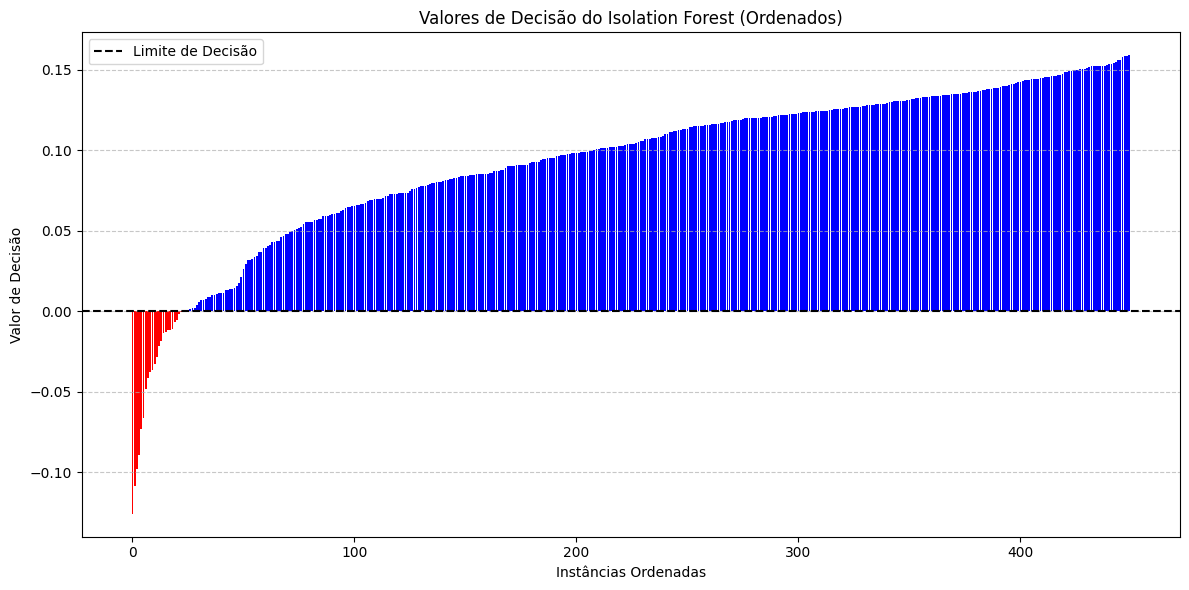

Exemplo de instâncias outliers:
                   team  points  goals  goals_taken  outlier  decision_score
0              Cruzeiro     101  100.0         48.0       -1       -0.125777
1              Flamengo      92   86.0         35.0       -1       -0.108527
2                Santos      87   92.0         61.0       -1       -0.097665
3                Santos      90  100.0         57.0       -1       -0.089209
4            América-RN      13   21.0         79.0       -1       -0.073205
5  Athletico Paranaense      87   98.0         59.0       -1       -0.066210

Exemplo de instâncias normais:
        team  points  goals  goals_taken  outlier  decision_score
23  Cruzeiro      76   64.0         37.0        1        0.000384
24     Goiás      71   81.0         66.0        1        0.000529


In [12]:
# Importando bibliotecas necessárias
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Carregar seus dados
df = pd.read_csv('brasileirao.mod.atualizado9.csv')

# Selecionando automaticamente todas as colunas numéricas
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Inicializando o modelo Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)  # Define a taxa de contaminação (exemplo: 5% de outliers)

# Ajustando o modelo aos dados
model.fit(numerical_data)

# Predizendo os outliers (1 para normal, -1 para outlier)
outliers = model.predict(numerical_data)

# Calculando os valores de decisão (decision function)
decision_scores = model.decision_function(numerical_data)

# Adicionando as colunas ao dataframe
df['outlier'] = outliers
df['decision_score'] = decision_scores

# Ordenando o DataFrame com base nos valores de decisão
df_sorted = df.sort_values(by='decision_score', ascending=True).reset_index(drop=True)

# Criando um gráfico de barras com os outliers destacados
plt.figure(figsize=(12, 6))
colors = ['red' if score < 0 else 'blue' for score in df_sorted['decision_score']]  # Vermelho para outliers
plt.bar(df_sorted.index, df_sorted['decision_score'], color=colors)

# Adicionando uma linha de referência para o limite de decisão
plt.axhline(0, color='black', linestyle='--', label='Limite de Decisão')

# Configurações do gráfico
plt.xlabel('Instâncias Ordenadas')
plt.ylabel('Valor de Decisão')
plt.title('Valores de Decisão do Isolation Forest (Ordenados)')
plt.legend(['Limite de Decisão'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Exibindo 6 exemplos de outliers
examples_outliers = df_sorted[df_sorted['outlier'] == -1][['team', 'points', 'goals', 'goals_taken', 'outlier', 'decision_score']].head(6)

# Exibindo 2 exemplos de instâncias normais
examples_normals = df_sorted[df_sorted['outlier'] == 1][['team', 'points', 'goals', 'goals_taken', 'outlier', 'decision_score']].head(2)

# Mostrando os exemplos
print("Exemplo de instâncias outliers:")
print(examples_outliers)
print("\nExemplo de instâncias normais:")
print(examples_normals)


## Tranformando Variável founded em INTEIRA

In [13]:
import pandas as pd

# Carregar a base de dados
df = pd.read_csv("brasileirao.mod.atualizado9.csv")

# Arredondar os valores de 'founded' para o inteiro mais próximo
df['founded'] = df['founded'].round().astype('Int64')  # Arredonda e converte para inteiro, mantendo valores nulos

# Salvar a base de dados modificada em um novo arquivo CSV
df.to_csv("brasileirao.mod.atualizado10.csv", index=False)

# Confirmar que a transformação foi feita com sucesso
print(df[['founded']].head())  # Exibir as primeiras linhas da coluna 'founded'


   founded
0     1900
1     1942
2     1918
3     1909
4     1912


## Análise das correlações entre as variáveis quantitativas.

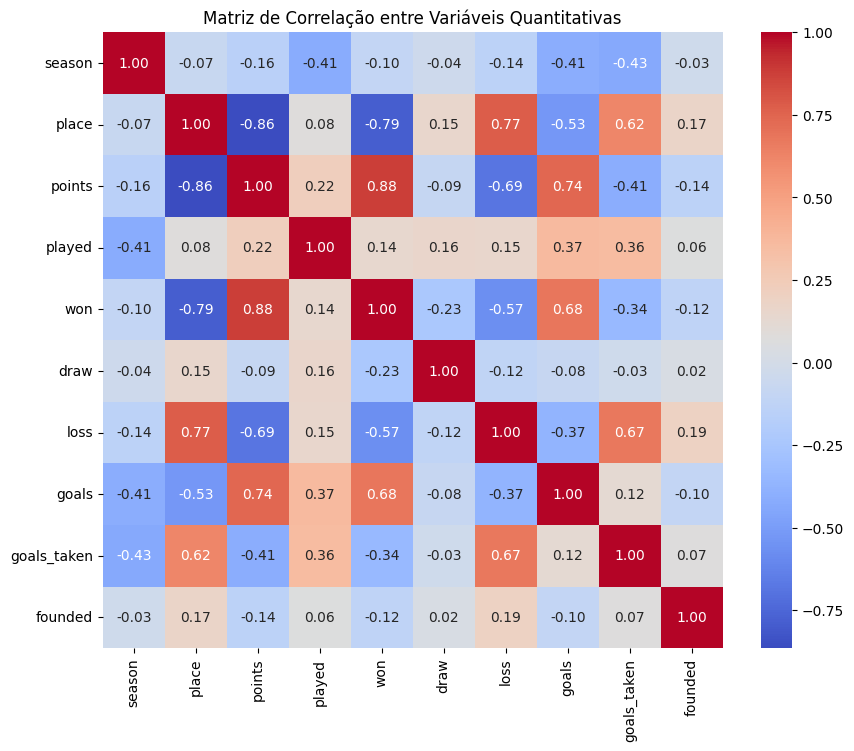

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base de dados (já pré-processada)
df = pd.read_csv("brasileirao.mod.atualizado10.csv")

# Selecionar todas as variáveis quantitativas (numéricas)
dados_quantitativos = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
matriz_correlacao = dados_quantitativos.corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação entre Variáveis Quantitativas")
plt.show()


## Análise descritiva identificando a melhor quantidade de grupos para o algoritmo k-Means ou hierárquico por meio do método do cotovelo.

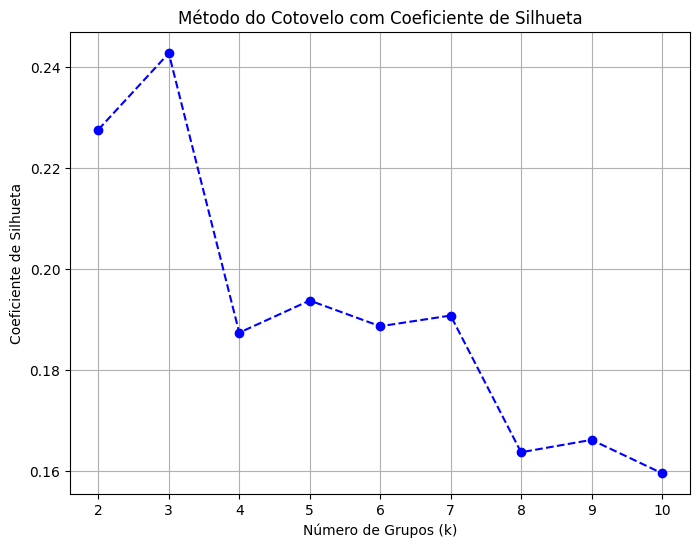

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supondo que df já foi carregado anteriormente
# Seleção das variáveis quantitativas
variaveis_quantitativas = df.select_dtypes(include='number').columns
dados_para_agrupamento = df[variaveis_quantitativas].dropna()

# Padronização dos dados
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_para_agrupamento)

# Lista para armazenar os valores do coeficiente de silhueta
silhouette_scores = []

# Testar diferentes números de clusters (mínimo 2 clusters, pois silhueta não é definida para k=1)
valores_k = range(2, 11)  # De 2 a 10 grupos
for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(dados_padronizados, labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o método baseado no coeficiente de silhueta
plt.figure(figsize=(8, 6))
plt.plot(valores_k, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title("Método do Cotovelo com Coeficiente de Silhueta")
plt.xlabel("Número de Grupos (k)")
plt.ylabel("Coeficiente de Silhueta")
plt.xticks(valores_k)
plt.grid(True)
plt.show()


## Análise de redução de dimensionalidade usando PCA

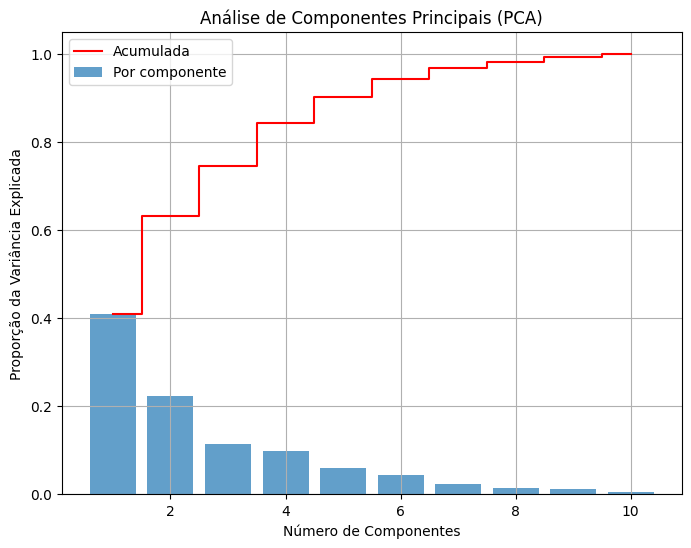

Número de componentes necessários para explicar 70% da variância: 3


In [16]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicação do PCA
pca = PCA()
dados_pca = pca.fit_transform(dados_padronizados)

# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_
variancia_acumulada = np.cumsum(variancia_explicada)

# Gráfico da variância explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7, label="Por componente")
plt.step(range(1, len(variancia_acumulada) + 1), variancia_acumulada, where="mid", color="red", label="Acumulada")
plt.title("Análise de Componentes Principais (PCA)")
plt.xlabel("Número de Componentes")
plt.ylabel("Proporção da Variância Explicada")
plt.legend()
plt.grid(True)
plt.show()

# Identificando o número de componentes necessários para 70% da variância
n_componentes = np.argmax(variancia_acumulada >= 0.70) + 1
print(f"Número de componentes necessários para explicar 70% da variância: {n_componentes}")


##  Análise dos grupos identificados por métodos de visualização em baixa dimensionalidade com o auxílio do PCA.


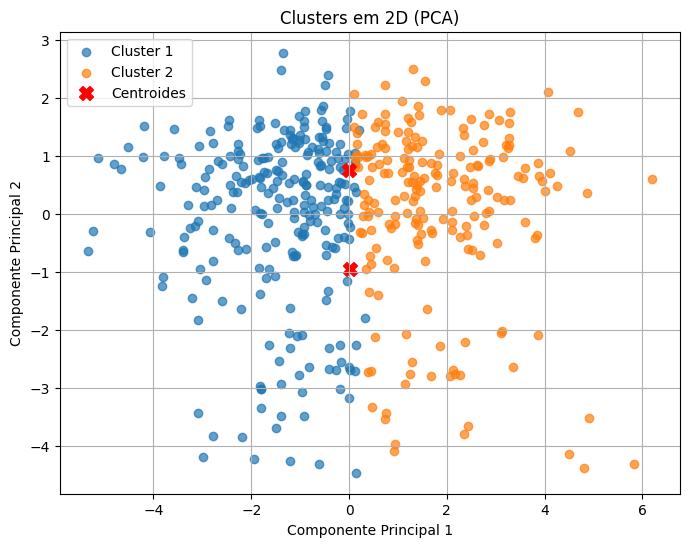

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados (substitua 'seu_arquivo.csv' pelo caminho correto)
df = pd.read_csv('brasileirao.mod.atualizado10.csv')

# Selecionando apenas as colunas numéricas
dados_numericos = df.select_dtypes(include=['float64', 'int64'])

# Padronizando os dados numéricos
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_numericos)

# Aplicando o K-Means com k=2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(dados_padronizados)

# Reduzindo a dimensionalidade para 2D com PCA
pca = PCA(n_components=2)
dados_2d = pca.fit_transform(dados_padronizados)

# Visualização 2D dos clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(2):  # k = 2
    plt.scatter(
        dados_2d[labels == cluster_id, 0],
        dados_2d[labels == cluster_id, 1],
        label=f"Cluster {cluster_id + 1}",
        alpha=0.7
    )

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=100, label='Centroides')
plt.title("Clusters em 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()


## Exclusão da Variável Points

In [18]:
import pandas as pd

# Carregar a base de dados
df = pd.read_csv("brasileirao.mod.atualizado10.csv")

# Excluir a variável
variavel = ['points']
df = df.drop(columns=variavel)

# Salvar a base atualizada
df.to_csv("brasileirao.mod.atualizado11.csv", index=False)

print("A variável POINTS foi excluída com sucesso")


A variável POINTS foi excluída com sucesso


# Análise preditiva

## Varíavel alvo escolhida: goals

## Análise da relação entre as variáveis preditivas e a variável alvo por meio de um modelo estatístico de regressão

In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Carregando a base de dados
data = pd.read_csv('brasileirao.mod.atualizado11.csv')

# Separando variáveis quantitativas e qualitativas
quantitative_columns = ['season', 'place', 'played', 'won', 'draw', 
                        'loss', 'goals_taken', 'founded']
qualitative_columns = ['team', 'stadium', 'city', 'state', 'region']

# Separar os dados quantitativos e qualitativos
quantitative_data = data[quantitative_columns]
qualitative_data = data[qualitative_columns]

# Aplicar One-Hot Encoding às variáveis qualitativas
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' evita multicolinearidade
categorical_encoded = pd.DataFrame(
    encoder.fit_transform(qualitative_data),
    columns=encoder.get_feature_names_out(qualitative_columns)
)

# Concatenar variáveis quantitativas e qualitativas codificadas
X = pd.concat([quantitative_data, categorical_encoded], axis=1)

# Definir a variável alvo
y = data['goals']

# Adicionar uma constante ao conjunto de preditores
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  goals   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     23.89
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.48e-95
Time:                        13:17:43   Log-Likelihood:                -1445.9
No. Observations:                 450   AIC:                             3006.
Df Residuals:                     393   BIC:                             3240.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Justificativa para a Análise de Hiperparâmetros

No contexto deste trabalho, foi utilizado um modelo de regressão linear para prever a variável **goals** (quantitativa). A regressão linear é um modelo simples e direto que não requer a escolha de um número de clusters ou vizinhos, como ocorre em modelos de classificação ou clusterização.

O método do cotovelo, amplamente utilizado para otimizar o número de clusters em técnicas como o K-means ou para determinar o melhor valor de `k` em KNN para classificação, não se aplica diretamente à regressão linear. Isso porque, no caso da regressão linear, o modelo não envolve a escolha de um número de vizinhos ou de clusters. O objetivo da regressão linear é ajustar uma equação linear para prever uma variável contínua com base em outras variáveis preditoras.

Portanto, no caso da regressão linear, não é necessário o uso do método do cotovelo, pois ele não é aplicável a este tipo de modelo preditivo.


## Análise das melhores variáveis preditores por uso de filtro


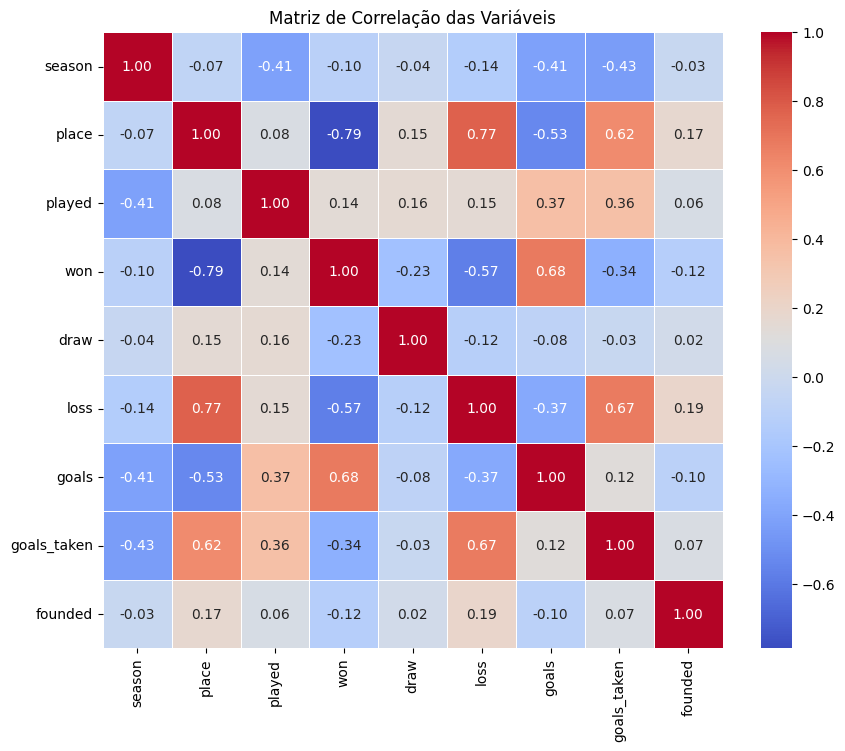

Variáveis relevantes: won      0.679944
goals    1.000000
Name: goals, dtype: float64


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando a base de dados
data = pd.read_csv('brasileirao.mod.atualizado11.csv')

# Selecionar apenas as colunas numéricas
numeric_df = data.select_dtypes(include=['number'])

# Calcular a correlação entre as variáveis numéricas
corr_matrix = numeric_df.corr()

# Visualizar a correlação entre as variáveis preditoras e a variável alvo
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

# Selecionando as variáveis com maior correlação absoluta com a variável alvo (goals)
cor_target = abs(corr_matrix["goals"])
relevant_features = cor_target[cor_target > 0.6]  # Ajuste o limiar conforme necessário
print("Variáveis relevantes:", relevant_features)


## Análise da generalização dos indutores por holdout incluindo um gráfico de dispersão da variável alvo pelos valores preditos

Análise por Holdout:
Mean Squared Error (MSE): 55.66581058882249
R² Score: 0.5431123419502002


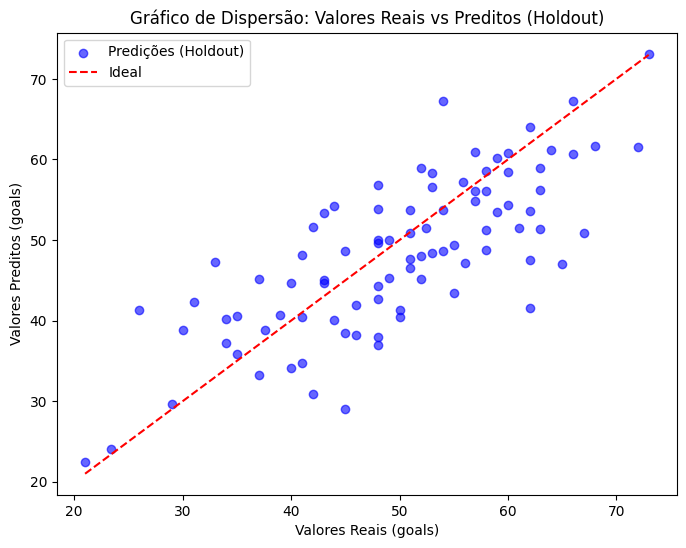

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
df = pd.read_csv('brasileirao.mod.atualizado9.csv')

# Definir as variáveis preditoras e a variável alvo
predictors = ['points', 'played', 'won', 'draw', 'loss']
X = df[predictors]
y = df['goals']

# Remover valores ausentes antes da análise
df_clean = df.dropna(subset=['goals'])  # Apenas linhas com 'goals' não nulo
X_clean = df_clean[predictors]
y_clean = df_clean['goals']

# Divisão dos dados em treino e teste (Holdout)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_test = model_lr.predict(X_test)

# Calcular métricas no conjunto de teste
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Análise por Holdout:")
print("Mean Squared Error (MSE):", mse_test)
print("R² Score:", r2_test)

# Gráfico de dispersão (valores reais vs preditos)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue', label='Predições (Holdout)')
plt.title("Gráfico de Dispersão: Valores Reais vs Preditos (Holdout)")
plt.xlabel("Valores Reais (goals)")
plt.ylabel("Valores Preditos (goals)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.legend()
plt.show()
